# Guía de Instalación de NVIDIA CUDA en Windows

Esta guía proporciona pasos detallados para instalar NVIDIA CUDA en un entorno Windows por medio de Windows Subsystem for Linux 2 (WSL2) y Miniconda.

**Requisitos:**

* OS Windows
* Tarjeta Gráfica NVIDIA
* Actualizar la versión más reciente de Winodws

**Pasos a seguir:**

1. Instalar WSL2
2. Instalar Miniconda en WSL
3. Instalar Drivers de Tarjeta Gráfica
4. Instalar RAPIDS
5. Instalar Extensiones VS Code en WSL
6. Verificar CUDA en IDE
7. Referencias


## 1. Instalar WSL2

Para realizar la instalación de correcta de WSL, siga estos pasos detallados. Alternativamente, puede consultar los [Pasos de instalación manual para versiones anteriores de WSL](https://learn.microsoft.com/es-es/windows/wsl/install-manual) en la documentación oficial de Microsoft, la cual sirve como base para este punto de la guía.

**Habilitar WSL**

Abra PowerShell como administrador y ejecute el siguiente comando para habilitar la característica de WSL:

```powershell
dism.exe /online /enable-feature /featurename:Microsoft-Windows-Subsystem-Linux /all /norestart
```

**Habilitar carácterística de Máquina Virtual**

Abra PowerShell como administrador y ejecute el siguiente comando para habilitar las funcionalidades de virtualización:

```powershell
dism.exe /online /enable-feature /featurename:VirtualMachinePlatform /all /norestart
```

Proceda a reiniciar el equipo.

**Descargar actualización del kernel de Linux**

En la documentación oficial de Microsoft [Pasos de instalación manual para versiones anteriores de WSL](https://learn.microsoft.com/es-es/windows/wsl/install-manual) desplazarse a la sección para descargar la versión más reciente del kernel de Linux y posteriormente ejecutarlo:

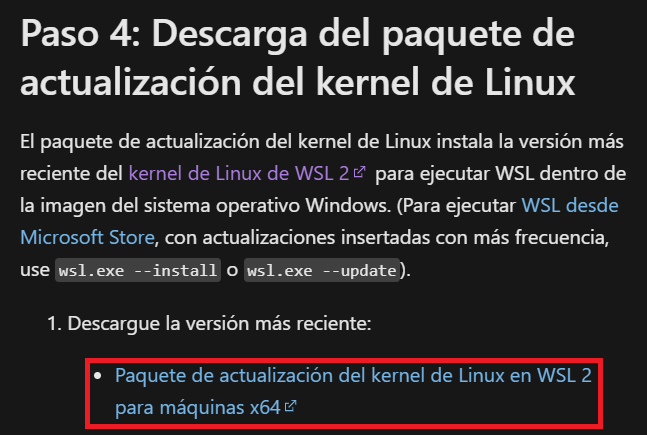


**WSL2 como versión predeterminada**

Abra PowerShell y ejecute el siguiente comando para establecer la versión predeterminada:

```powershell
wsl --set-default-version 2
```

**Instalar distribución Linux**

Abrir Microsoft Store e instalar la distribución Ubuntu, la cuál por lo general posee la versión más actualizada.+

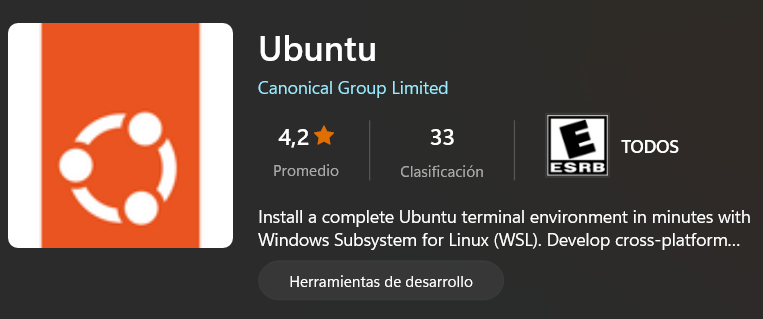

Abrir la terminal de Ubuntu, crear una cuenta de usuario  y contraseña.

**Actualizar paquetes de la distribución Linux**

En la terminal de Ubuntu y ejecutar el siguente comando para actualizar los paquetes en WSL:

```bash
sudo apt update && upgrade
```

Ingresar la contraseña establecida anteriormente.

**Instalar Neofetch (Opcional)**

En la terminal de Ubuntu, instalar Neofetch para ver las características de la distribución con el siguiente comando:

```bash
sudo apt install neofetch
```
Para ver las carácterísticas escribir neofetch en la terminal.

## 2. Instalar Miniconda en WSL

**Descargar Miniconda**

Visita la sección de [últimos instaladores de Miniconda por versión de Python](https://docs.anaconda.com/free/miniconda/miniconda-other-installer-links/) en la página oficial de Conda.

Para conocer la versión de Python usada por el OS, abrir la terminal de Ubuntu y ejecuta el siguiente comando:

```bash
python3 --version
```

En esta guía, asumimos un sistema operativo con Python 3.10 y una arquitectura X64. Descarga el archivo correspondiente a tu sistema, para nuestro ejemplo descargaremos el archivo **Miniconda3 Linux 64-bit**.

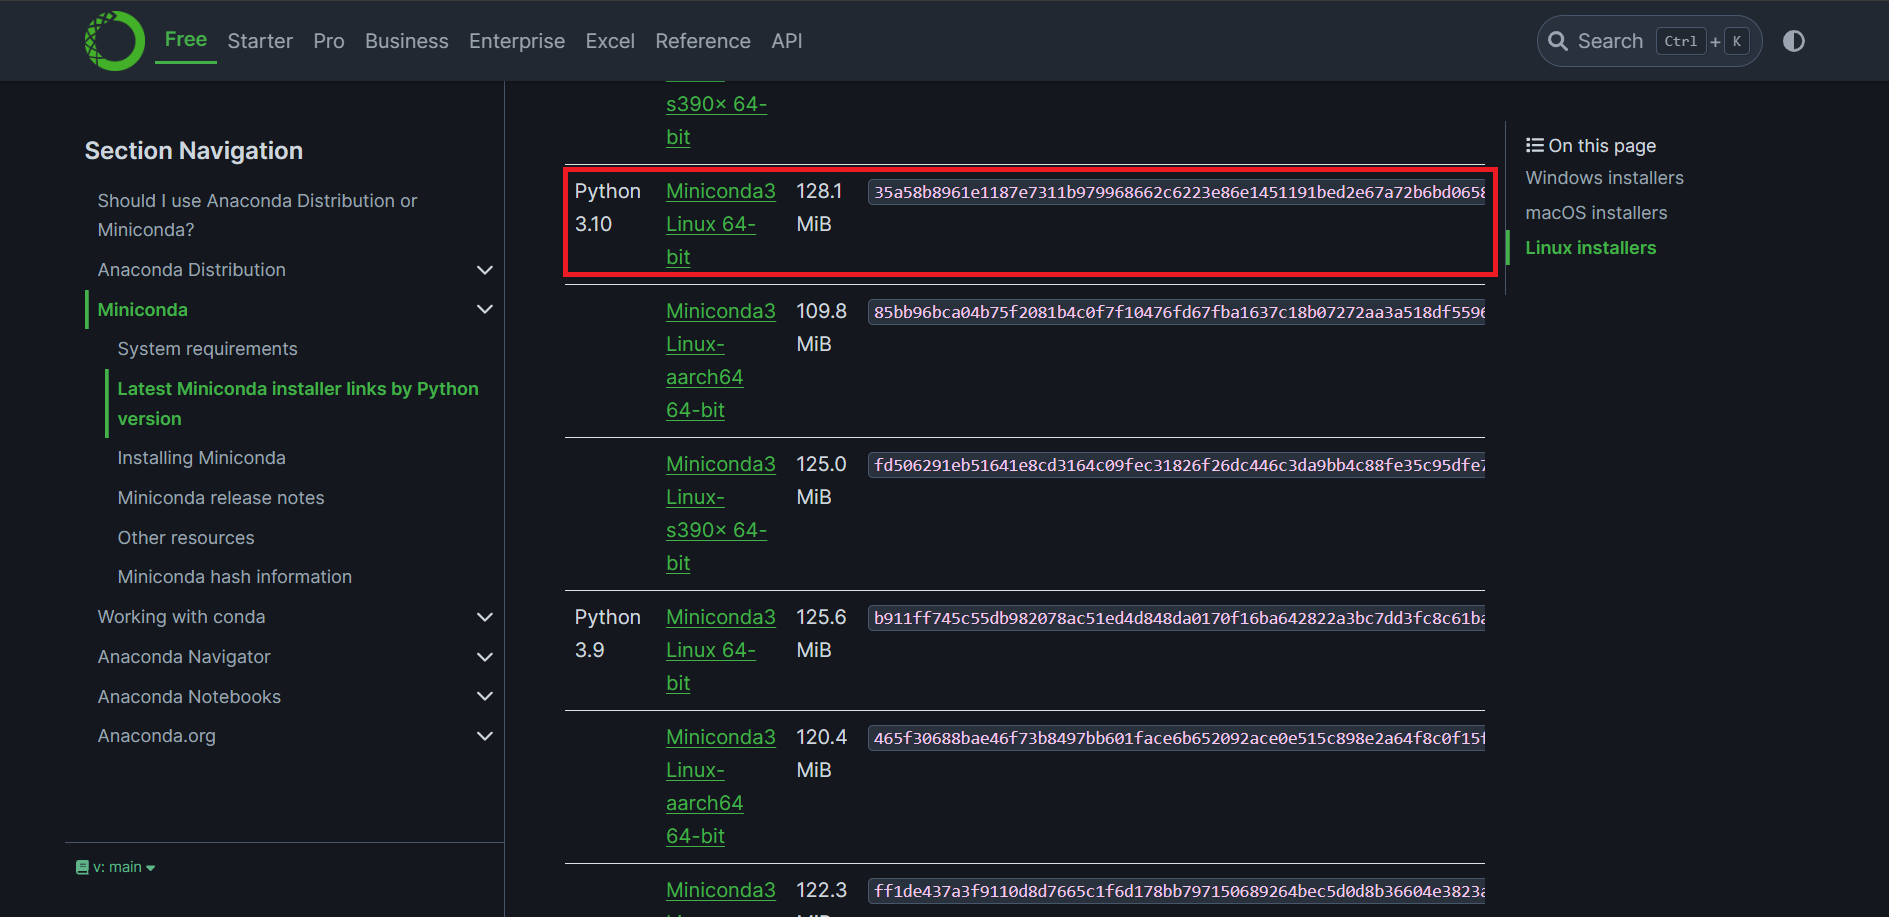

**Instalación**

Dirigete a la carpeta donde descargaste el archivo utilizando la terminal de Ubuntu y ejecuta el siguiente comando, teniendo encuenta el nombre del archivo:

```bash
chmod +x ./Miniconda3-py310_23.11.0-2-Linux-x86_64.sh
```

Luego, ejecuta el archivo con el siguiente comando:

```bash
./Miniconda3-py310_23.11.0-2-Linux-x86_64.sh
```

Presiona **Enter** para comenzar. Puedes leer la licencia de usuario u omitirla presionando **q**. Después, acepta la licencia escribiendo **yes**

**Directorio de instalación**

Establece el directorio por defecto, por medio del siguiente comando:

```bash
{HOME}/.miniconda3
```

Después de instalar el ambiente base, presionar **Enter** para finalizar la instalación.

Retorna al directorio base con el comando:

```bash
cd
```

Luego ejecuta:

```bash
nano -wc .bashrc
```

Ve al final presionado **Ctrl + abajo**, presiona **Enter** y escribe:

```bash
export PATH=${PATH}:${HOME}/.miniconda3/bin
```

Sal del editor presionando **Ctrl + x** y escribe **yes**

**Verificar la instalación de Miniconda**

Ejecuta el comando:

```bash
source .bashrc
```

Luego, ejecuta el comando:

```bash
conda update conda
```

Si no retorna errores, la instalación ha sido exitosa. en este punto Miniconda debería buscar actualizaciones, si las hay presiona **y** para actualizar.

**Conda**

Ejecuta el siguiente comando:

```bash
conda config --set auto_activate_base false
```

Sal de la terminal con el comando:

```bash
exit
```

Abre una nueva terminal de Ubuntu y ejecuta el comando:
```bash
conda init
```

Miniconda ahora ha sido instalado y configurado.



## 3. Instalar Drivers de Tarjeta Gráfica

Visita la páginca oficial de NVIDIA en la [Descarga de controladores NVIDIA](https://www.nvidia.es/Download/index.aspx?lang=es) y completa los campos con la información correspondiente a tu tarjeta gráfica y sistema operativo. En esta guía, asumimos una tarjeta gráfica NVIDIA GeForce GTX 1650 Ti.


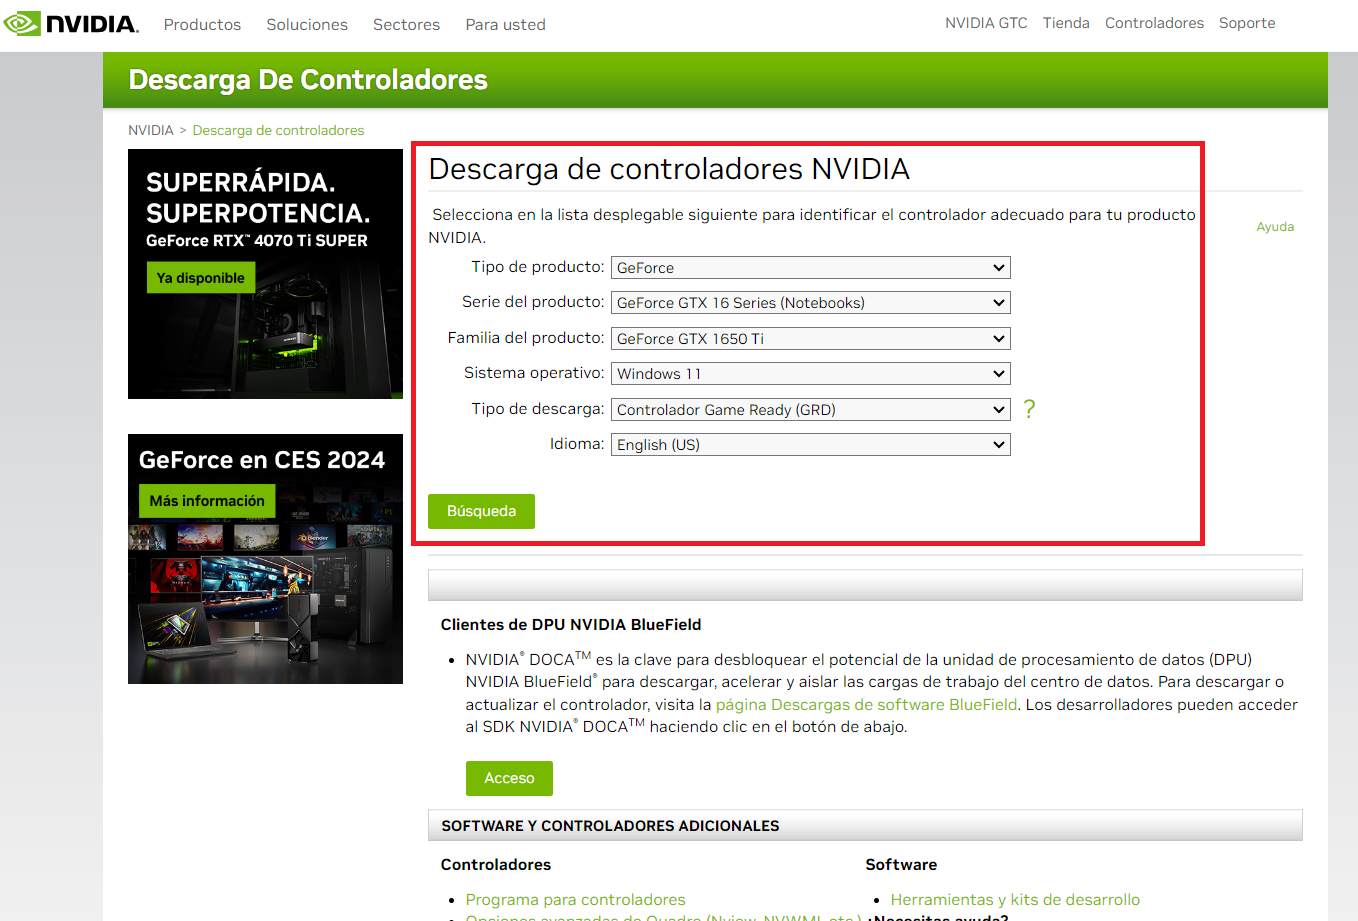

Descarga el controlador y ejecuta el archivo para instalarlo en Windows OS.

**Instalación de Controladores NVIDIA en WSL**

Abre la terminal de Ubuntu y ejecuta el siguiente comando para actualizar los paquetes:

```bash
sudo apt update && upgrade
```

Luego, instala los controladores según la versión. En este ejemplo, instalamos la versión 545:


```bash
sudo apt install nvidia-driver-545
```

Para verificar la instalacción fue exitosa,  ejecuta el siguiente comando:

```bash
nvidia-smi
```

Deberías ver la información correspondiente a los controladores instalados.

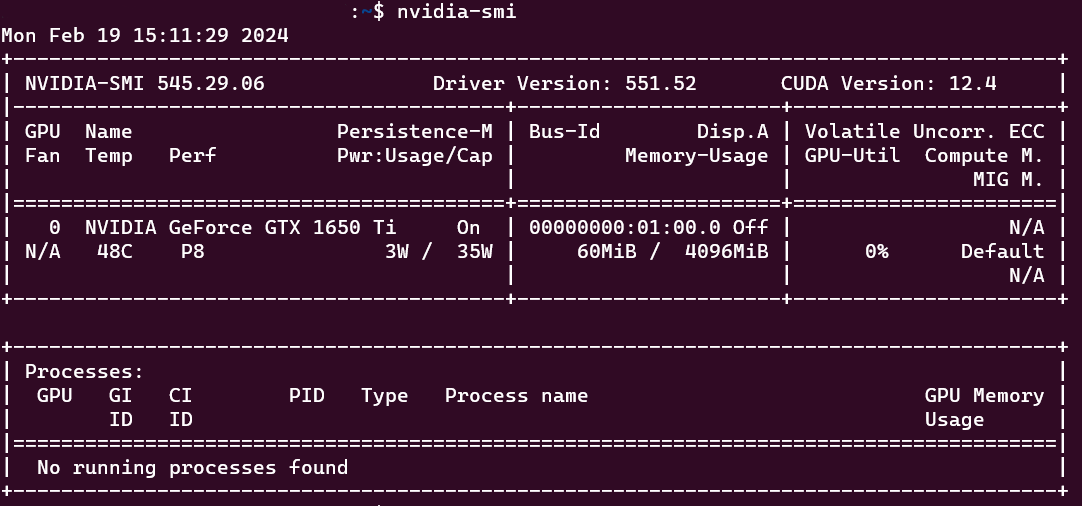


## 4. Instalar RAPIDS

Visitar la Guía de [Instalación de Rapids](https://docs.rapids.ai/install?_gl=1*1l55d5n*_ga*MjAzMzQ4OTI2Ni4xNzA4MjA5MzI0*_ga_RKXFW6CM42*MTcwODIwOTMyNC4xLjEuMTcwODIxMDEzMy42MC4wLjA.#selector) en la sección **Install RAPIDS** y copia la línea de comando correspondiente. En este ejemplo, hemos seleccionado paquetes específicos como cuDF y cuML, y el nombre del ambiente virtual se estableció como **cuda**.

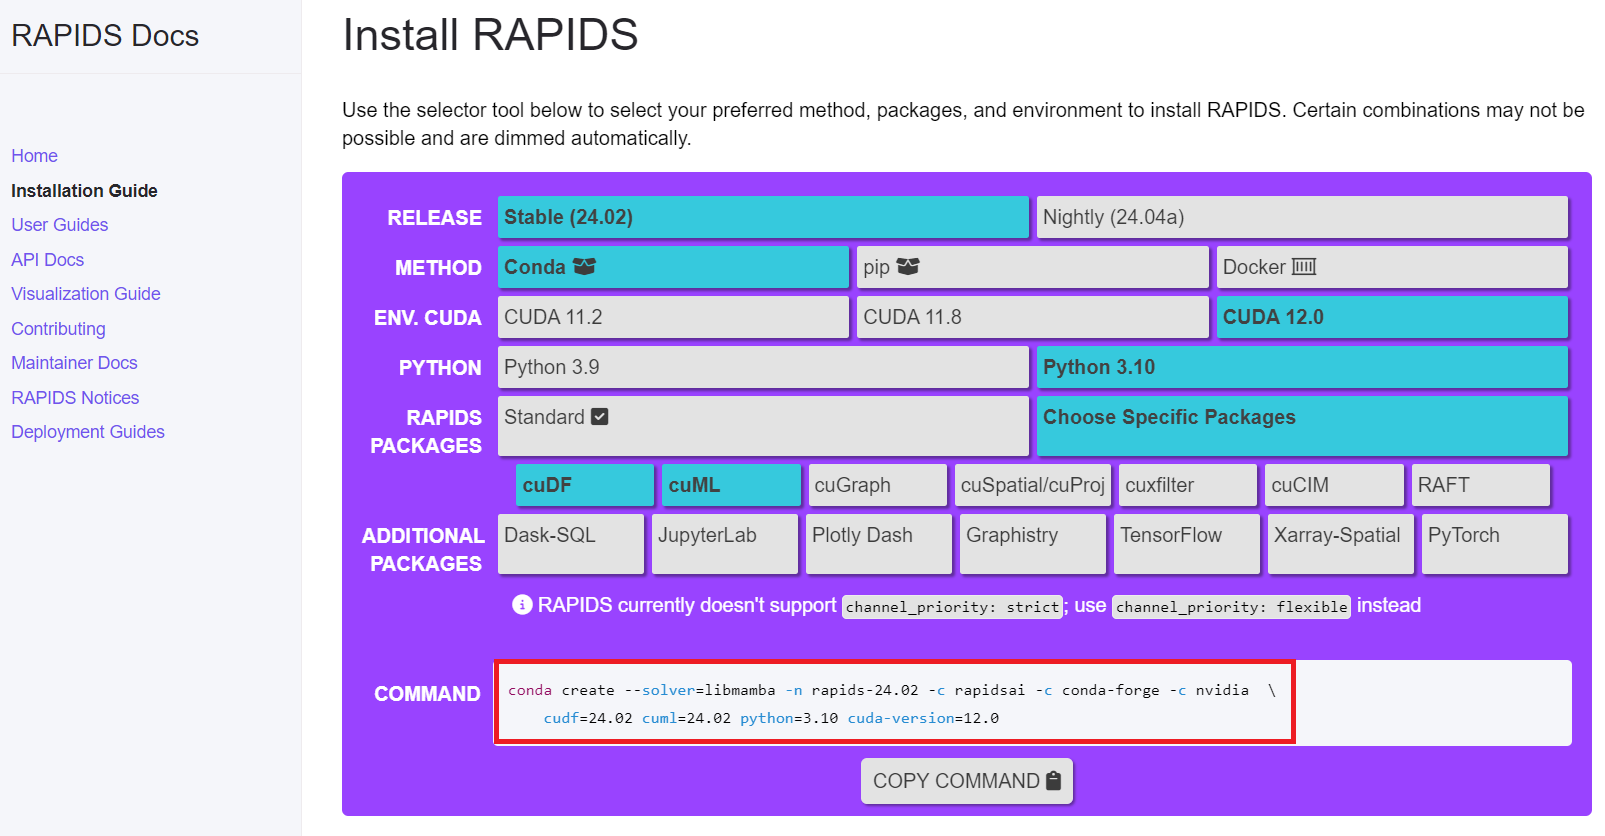

**Instalar RAPIDS**

Usa el siguiente comando como ejemplo:

```bash
conda create --solver=libmamba -n cuda -c rapidsai -c conda-forge -c nvidia  \
    cudf=24.02 cuml=24.02 python=3.10 cuda-version=12.0
```
**Ambiente Virtual**

Activa el ambiente virtual **cuda** (o como lo hayas nombrado) y ejecuta el siguiente comando para verificar que las librerías de CUDA estén instaladas:

```bash
conda list
```
**Librerías Adicionales**

Instala la librería Pytorch:

```bash
conda install -c pytorch pytorch
```

Luego, instala ipykernel o las librerías adicionales que necesites:

```bash
conda install -c ipykernel
```

## 5. Instalar Extensiones VS Code en WSL

En la terminal de Ubuntu, abre VS Code con el siguiente comando:

```bash
code .
```

Se instalará dentro de WSL y, una vez abierto el IDE, asegúrate de tener instaladas las siguientes extensiones:

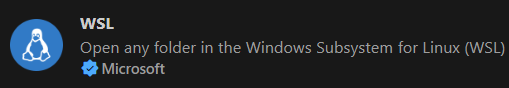

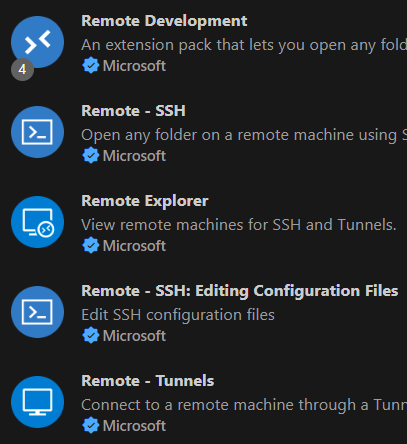

## 6. Verificar activación de CUDA

Finalmente, asegúrate de que puedas utilizar la biblioteca CUDA. Abre un Jupyter Notebook en VS Code y ejecuta el siguiente código:

```python
import torch

torch.cuda.is_available()
```

Si el resultado es True, significa que CUDA está activado y listo para ser utilizado. ¡Felicidades!

## 7. Referencias

1. Craigloewen-Msft. Pasos de instalación manual para versiones anteriores de WSL. Microsoft Learn. https://learn.microsoft.com/es-es/windows/wsl/install-manual. Published 5 de diciembre de 2023.
2. TrujilloSoft. WSL 2: Instalar Linux en Windows 11. YouTube. marzo 2023. https://www.youtube.com/watch?v=6U2caEujxZ4.
3. The Strawberry Data Scientist. Miniconda installation guide (Ubuntu 22.04 LTS). YouTube. agosto 2023. https://www.youtube.com/watch?v=KkEoaPgeuCc.
4. Descargar los últimos controladores oficiales de NVIDIA. https://www.nvidia.es/Download/index.aspx?lang=es.
5. Installation Guide - RAPIDS Docs. RAPIDS Docs. https://docs.rapids.ai/install?_gl=1*1l55d5n*_ga*MjAzMzQ4OTI2Ni4xNzA4MjA5MzI0*_ga_RKXFW6CM42*MTcwODIwOTMyNC4xLjEuMTcwODIxMDEzMy42MC4wLjA.#selector.
6. RomanAcademy. How to Install NVIDIA Drivers on Ubuntu 22.04 LTS - RomanAcademy - Medium. Medium. https://roman-academy.medium.com/how-to-install-nvidia-drivers-on-ubuntu-22-04-lts-6186e2f66749. Published noviembre 7, 2022.
7. Python Simplified. CUDA Simply Explained - GPU vs CPU Parallel Computing for Beginners. YouTube. diciembre 2021. https://www.youtube.com/watch?v=r9IqwpMR9TE.
